In [ ]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

In [19]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
#white
# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [20]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [21]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [34]:
wines.to_csv('WineFullData.csv')

In [35]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [22]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = 
train_test_split(X, y, test_size=0.33, random_state=42)

/Users/rajnishechauhan/anaconda/envs/dl_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [36]:
X_train.shape

(4352, 11)

In [23]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [24]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [25]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.19017011,  0.1119678 , -0.448294  ,  0.37997532,  0.24701822,
         -0.27561885, -0.24563742, -0.07929263, -0.02962729, -0.38604623,
         -0.14888456, -0.4856225 ],
        [-0.32617873,  0.18531877, -0.2563587 ,  0.21813202, -0.22807723,
          0.12636203,  0.02936709,  0.43272775,  0.47795272, -0.22366709,
         -0.25138232,  0.26065314],
        [-0.41533962,  0.00593233,  0.4795336 , -0.21435156,  0.14838445,
          0.05859399,  0.23748541, -0.08930764,  0.19966316,  0.1267944 ,
          0.26688808,  0.06110191],
        [ 0.07813603, -0.29873505,  0.08442503,  0.13383913, -0.48318666,
         -0.41757926, -0.40140146, -0.15249258,  0.16900176,  0.48999423,
          0.11969173, -0.42718816],
        [ 0.16736794, -0.17194793, -0.19828784,  0.1860326 , -0.39993626,
         -0.43237835,  0.07419568, -0.15438995, -0.18883899,  0.19858646,
          0.3781548 ,  0.15258259],
        [-0.42688164,  0.13265306, -0.50609255, -0.3857828 ,  0.0282588 ,
      

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])
                   
history = model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.1021 - binary_accuracy: 0.9584
Epoch 2/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0256 - binary_accuracy: 0.9952
Epoch 3/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0214 - binary_accuracy: 0.9963
Epoch 4/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0180 - binary_accuracy: 0.9968
Epoch 5/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0164 - binary_accuracy: 0.9968
Epoch 6/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0141 - binary_accuracy: 0.9972
Epoch 7/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0130 - binary_accuracy: 0.9968
Epoch 8/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0118 - binary_accuracy: 0.9977
Epoch 9/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0109 - binary_accuracy: 0.9979
Epoch 10/20
4352

In [27]:
score = model.evaluate(X_test, y_test, verbose=True)

print(score[1])



2145/2145 [==============================] - 1s 378us/step
0.9939393939393939


In [28]:
y_test[:5]

array([0, 1, 0, 0, 0])

In [29]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 23us/step
[0.029239490605004796, 0.9939393939393939]


In [31]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'binary_accuracy'])


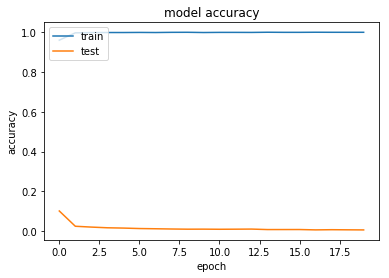

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
